#Unsupervised Learning Project
**Customer Segmentation Personality Clustering**

Customer segmentation is the practice of dividing a customer base into groups with shared characteristics. This can help business tailor their marketing strategies to effectively target customers with better offerings.  

Project Goal: Identify groups of customers based on certain attributes and spending habits.

Using K-means clustering and Hierarchical clustering methods to determine groups of customers.

Link to dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.impute import SimpleImputer


In [60]:
market_data = pd.read_csv('/content/marketing_campaign.csv', sep = "\t")

#EDA

**Data Description**:

People descriptions:
  *   ID: Customer's unique identifier
  *   Year_Birth: Customer's birth year
  * Education: Customer's education level
  * Marital_Status: Customer's marital status
  * Income: Customer's yearly household income
  * Kidhome: Number of children in customer's household
  * Teenhome: Number of teenagers in customer's household
  * Dt_Customer: Date of customer's enrollment with the company
  * Recency: Number of days since customer's last purchase
  * Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Purchase Descriptions


*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
* NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


This dataset is 2224 rows by 29 columns












In [61]:
market_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [62]:
print(market_data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [63]:
print(market_data.shape)

(2240, 29)


The data types in this dataset are objects, floats, and ints.

In [64]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Calculate age from when the dataset was created, 2021.

In [65]:
market_data['Age'] = 2021 - market_data['Year_Birth']
market_data = market_data.drop("Year_Birth", axis=1)


Create a column for total money spent, total children, total accepted campaigns, and total purchases.

In [69]:
market_data['TotalSpend'] = market_data['MntWines'] + market_data['MntFruits'] + market_data['MntMeatProducts'] + \
                  market_data['MntFishProducts'] + market_data['MntSweetProducts'] + market_data['MntGoldProds']


market_data['TotalChildren'] = market_data['Kidhome'] + market_data['Teenhome']

market_data['TotalAcceptedCmp'] = market_data['AcceptedCmp1'] + market_data['AcceptedCmp2'] + market_data['AcceptedCmp3'] + \
                         market_data['AcceptedCmp4'] + market_data['AcceptedCmp5'] + market_data['Response']

market_data['TotalPurchases'] = market_data['NumDealsPurchases'] + market_data['NumWebPurchases'] + \
                       market_data['NumCatalogPurchases'] + market_data['NumStorePurchases']

Group the relationship status.

In [70]:
market_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [71]:
group = {'Alone':'Single', "Absurd": "Single", "YOLO": "Single"}

market_data['Marital_Status'] = market_data["Marital_Status"].replace(group)


Drop unnecessary columns.

In [72]:
cols_to_drop = ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df = market_data.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

Look for null values.

In [73]:
df.isnull().sum()

,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


Using SimpleImputer from sklearn to impute missing values in income with the median value.

In [74]:
#df = df.dropna()
#df.isnull().sum()
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

Plot income by age.

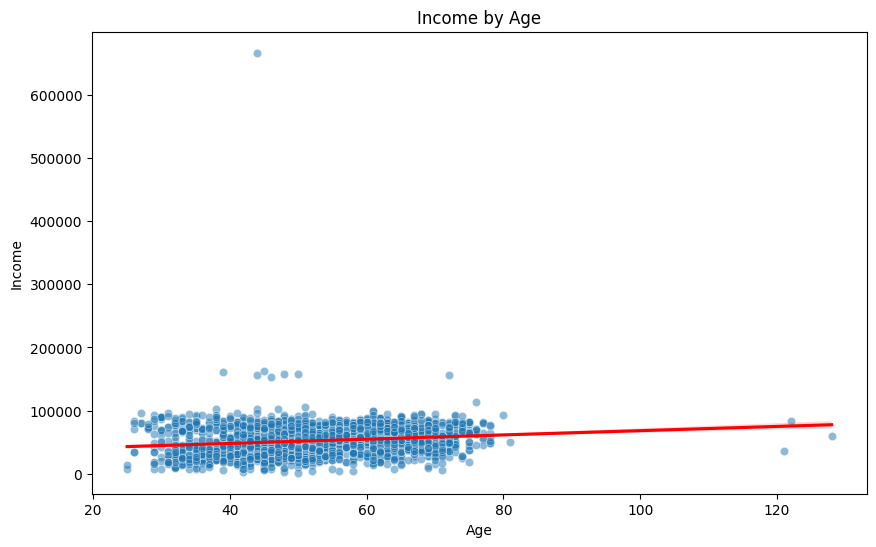

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Income'], alpha=0.5)
sns.regplot(x=df['Age'], y=df['Income'], scatter=False, color='red')
plt.title("Income by Age")
plt.show()

Use one hot encoding to turn object data types into numerical.

In [76]:
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

In [81]:
scaler = StandardScaler()
cluster_features = ['Age', 'Income', 'TotalSpend', 'TotalChildren',
                   'TotalAcceptedCmp', 'TotalPurchases', 'NumWebVisitsMonth', 'Recency']
df_scaled = df_encoded.copy()
df_scaled[cluster_features] = scaler.fit_transform(df_scaled[cluster_features])

#Unsupervised Learning (K-means/Hierarchical)



To find the optimal amount of clusters use the **Elbow Method**. The elbow method iterates over a different number of clusters and checks the WCSS (Within-Cluster Sum of Squares) turning point from the graph. The code below plots kmeans.inertia_ for each number of cluster from 1-11. The optimal K value is shown as 3 clusters based on the plot.

optimal k = right amount of cluster or elbow point on graph

Finding the right amount of clusters is important when using kmeans. A k that is not optimal may not represent the information well and make insignficant clusters.

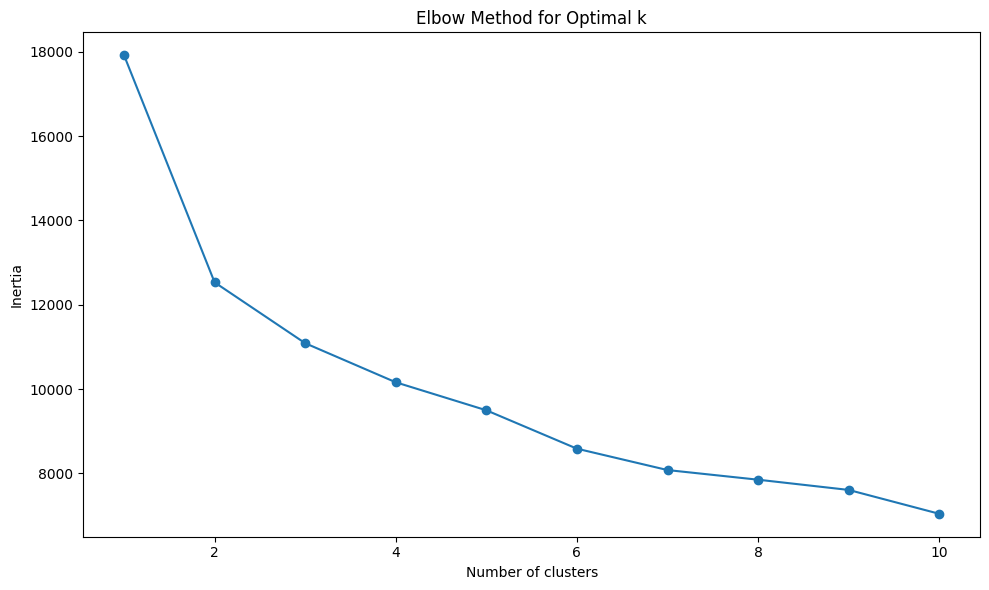

In [82]:
features = df_scaled[cluster_features]
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()


In [83]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['KMeans_Cluster'] = kmeans.fit_predict(features)

Hierarchical Clusters visualized through dendograms. Dendograms are a good way to visualize how clusters are made in hierarchical clustering.

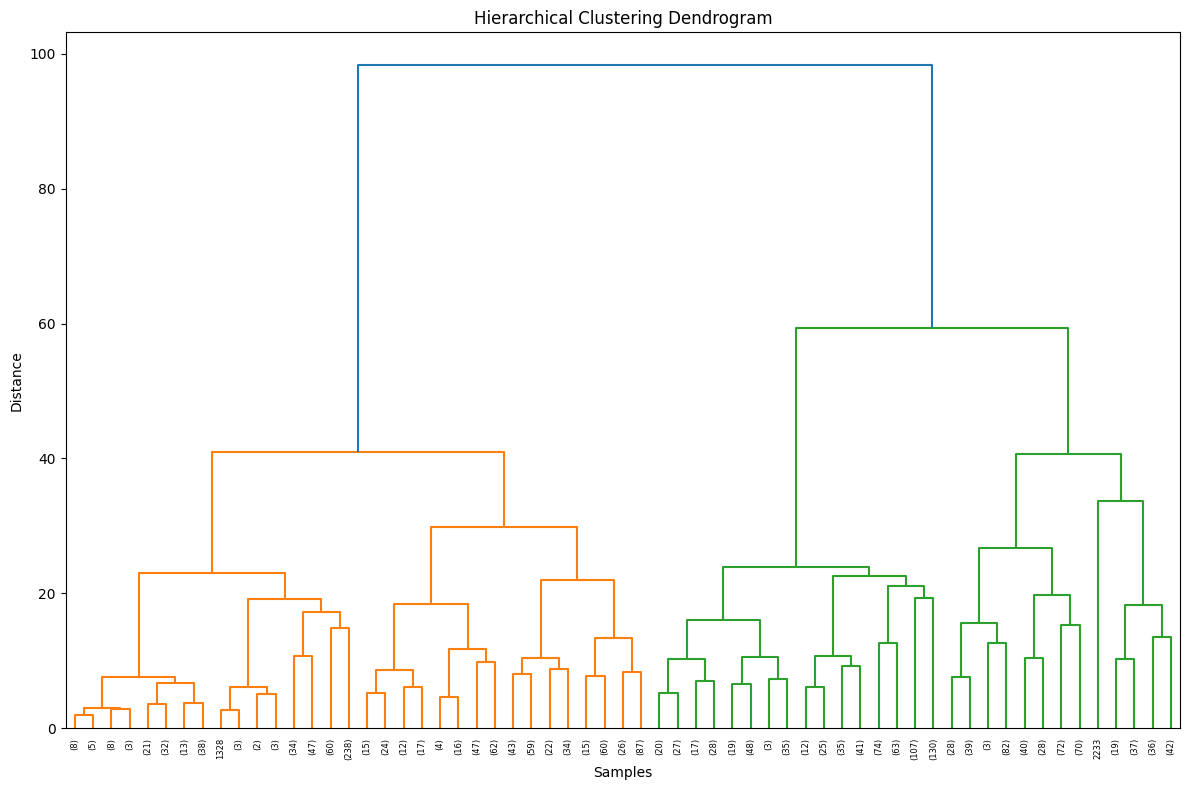

In [84]:
Z = linkage(features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_encoded['HC_Cluster'] = hc.fit_predict(features)

Use PCA for dimension reduction.

In [85]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [86]:
pca_df['KMeans_Cluster'] = df_encoded['KMeans_Cluster']

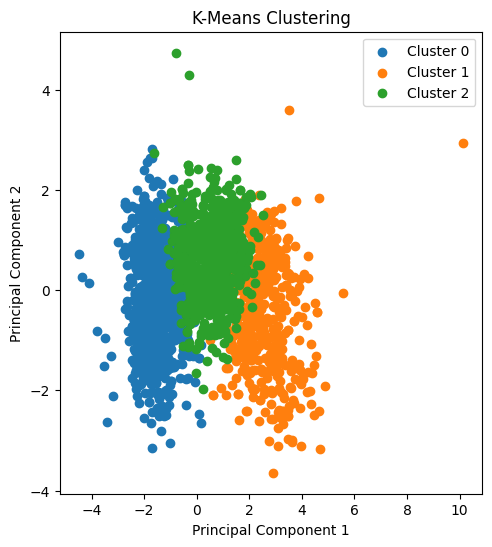

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in range(3):
    cluster_data = pca_df[pca_df['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [88]:
pca_df['HC_Cluster'] = df_encoded['HC_Cluster']

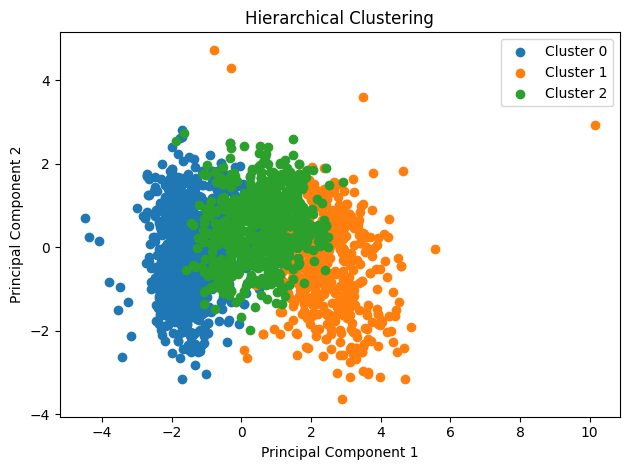

In [89]:

for cluster in range(3):
    cluster_data = pca_df[pca_df['HC_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()

#Results

**Graph 1**
Distribution of attributes(total spending, total children, income, and age)

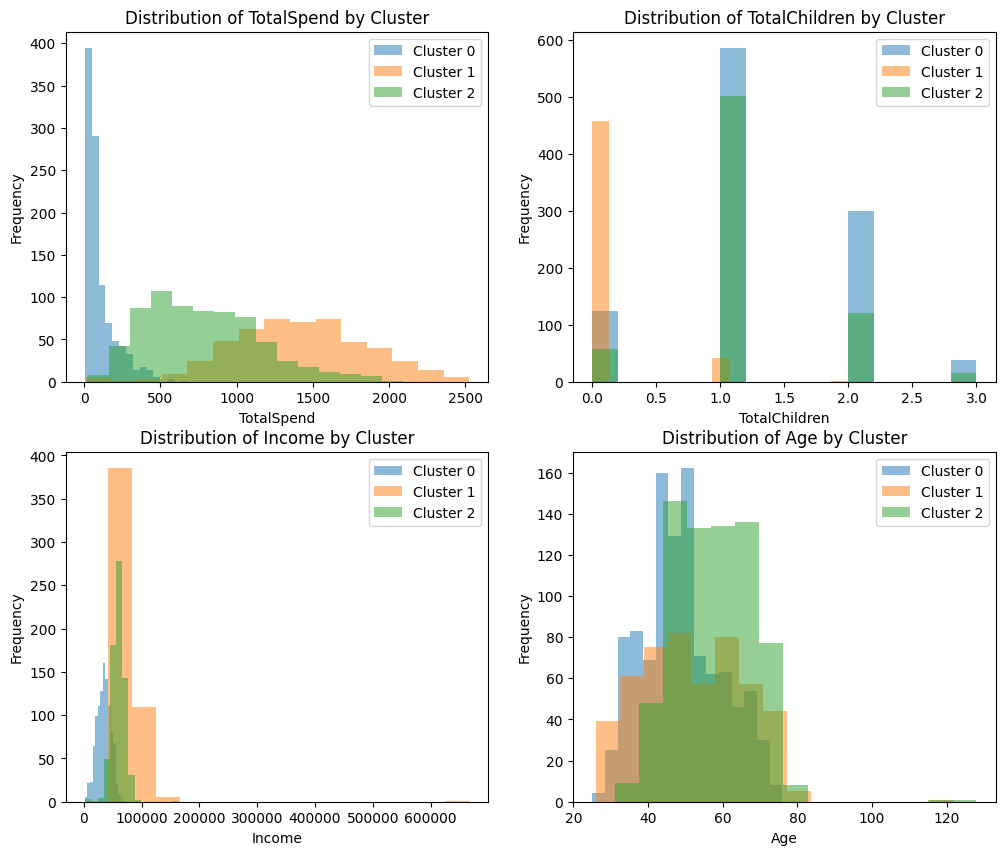

In [90]:
df['KMeans_Cluster'] = df_encoded['KMeans_Cluster']
attributes = ['TotalSpend', 'TotalChildren', 'Income', 'Age']
plt.figure(figsize=(12, 10))
for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i+1)
    for cluster in range(3):
        cluster_data = df[df['KMeans_Cluster'] == cluster][attribute]
        plt.hist(cluster_data, alpha=0.5, bins=15, label=f'Cluster {cluster}')

    plt.title(f'Distribution of {attribute} by Cluster')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.legend()

**Graph 2** Purchase category based on cluster

<Figure size 1400x800 with 0 Axes>

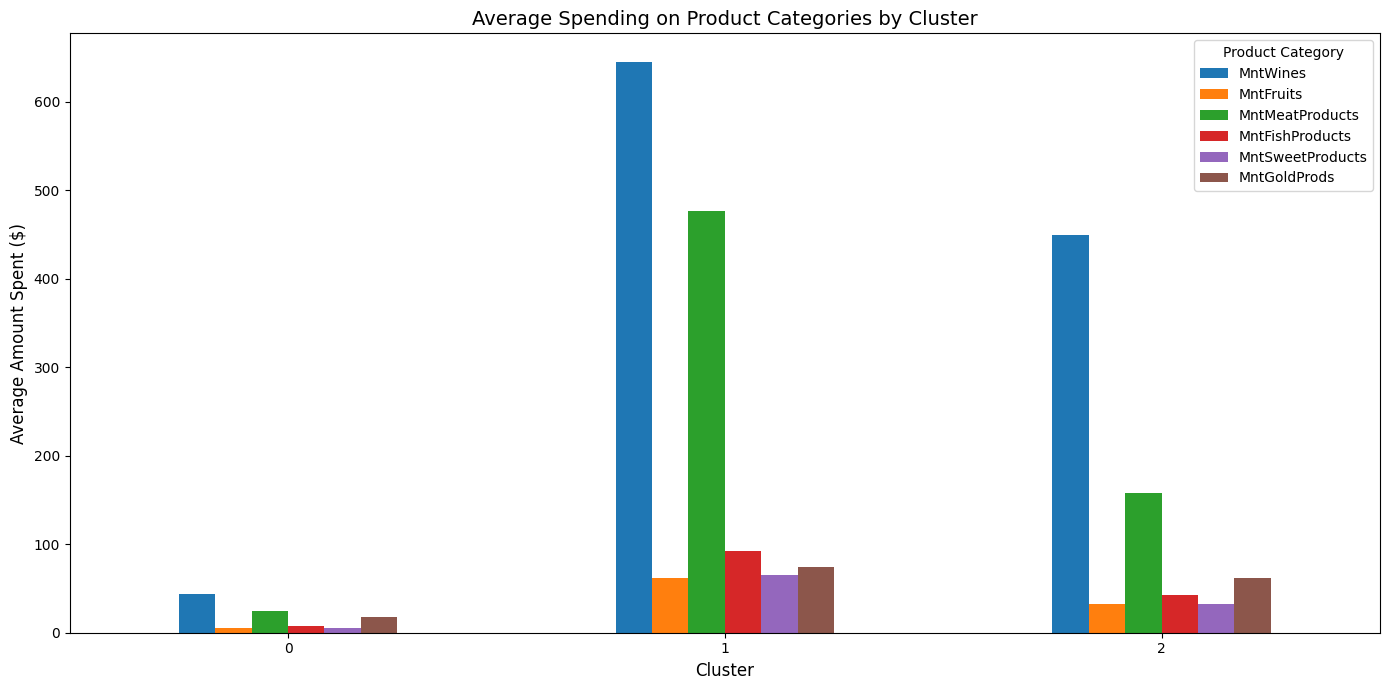

In [93]:
plt.figure(figsize=(14, 8))
purchase_by_cluster.plot(kind='bar', figsize=(14, 7))
plt.title('Average Spending on Product Categories by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Amount Spent ($)', fontsize=12)
plt.legend(title='Product Category', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

**Graph 3** Purchase channel frequency by each cluster

<Figure size 1400x800 with 0 Axes>

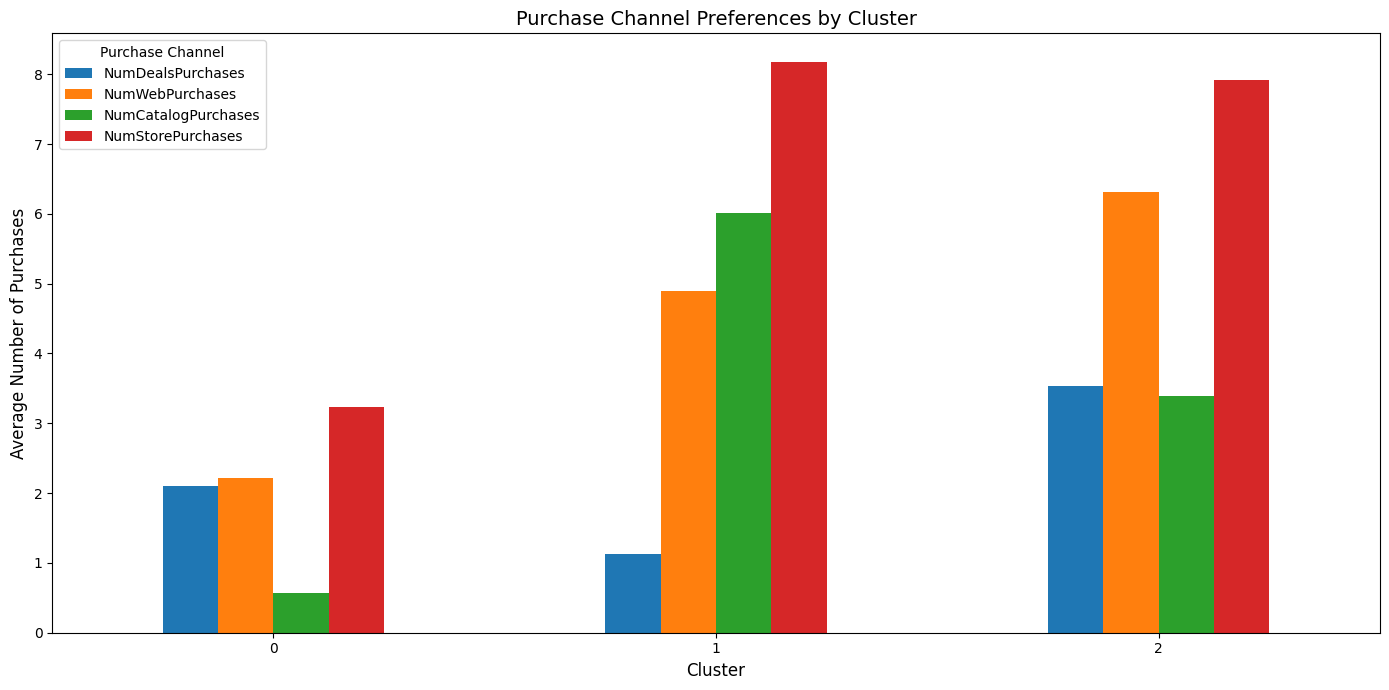

In [94]:
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channels_by_cluster = df.groupby('KMeans_Cluster')[purchase_channels].mean()

plt.figure(figsize=(14, 8))
channels_by_cluster.plot(kind='bar', figsize=(14, 7))
plt.title('Purchase Channel Preferences by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Number of Purchases', fontsize=12)
plt.legend(title='Purchase Channel', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

#Conclusions
The goal was to cluster customers by certain factors and analyze their spending patterns.

**Cluster 0:** This cluster is mainly lower income with children. Their spending habits lean towards more deals, web, and store purchases. This group also spends the least.

**Cluster 1:** This cluster is higher income people with no children. This group is the highest spending cluster and they lean towards in store and catalog purchases. This group spends the most.

**Cluster 2:** This cluster is higher income with children. The income in this cluster is generally lower than cluster 1 and they do less category shopping than cluster 1 and use more deal purchases. They still lean towards store and web purchases.

Based on this information you can make marketing decisions to properly advertise to the right groups. Cluster 0 and 2 are more likely to shop using deals than cluster 1 and catalog purchases are more likely to do well with cluster 1. All three clusters spend more on wine and then meat.

#References

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/#
https://www.techtarget.com/searchcustomerexperience/definition/customer-segmentation

